"C:\Users\aprak\OneDrive\Documents\Upgrad\ML_AI\ML-1\ML_BikeSharing_Assignment\day.csv"

# 0. Importing Required Libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')

In [4]:
bike = pd.read_csv(r'C:\Users\aprak\OneDrive\Documents\Upgrad\ML_AI\ML-1\ML_BikeSharing_Assignment\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
bike.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [6]:
#Convert Data types of a dteday to Datetime datatype

bike['dteday'] = pd.to_datetime(bike['dteday'], dayfirst = True)


In [7]:
bike.shape

(730, 16)

In [8]:
#Cheking for any missing values
bike.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [9]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

# 1. Exploratory Data Analytics
## 1.1 Plotting all variables to see if there is a pattern in distribution of total bike rentals

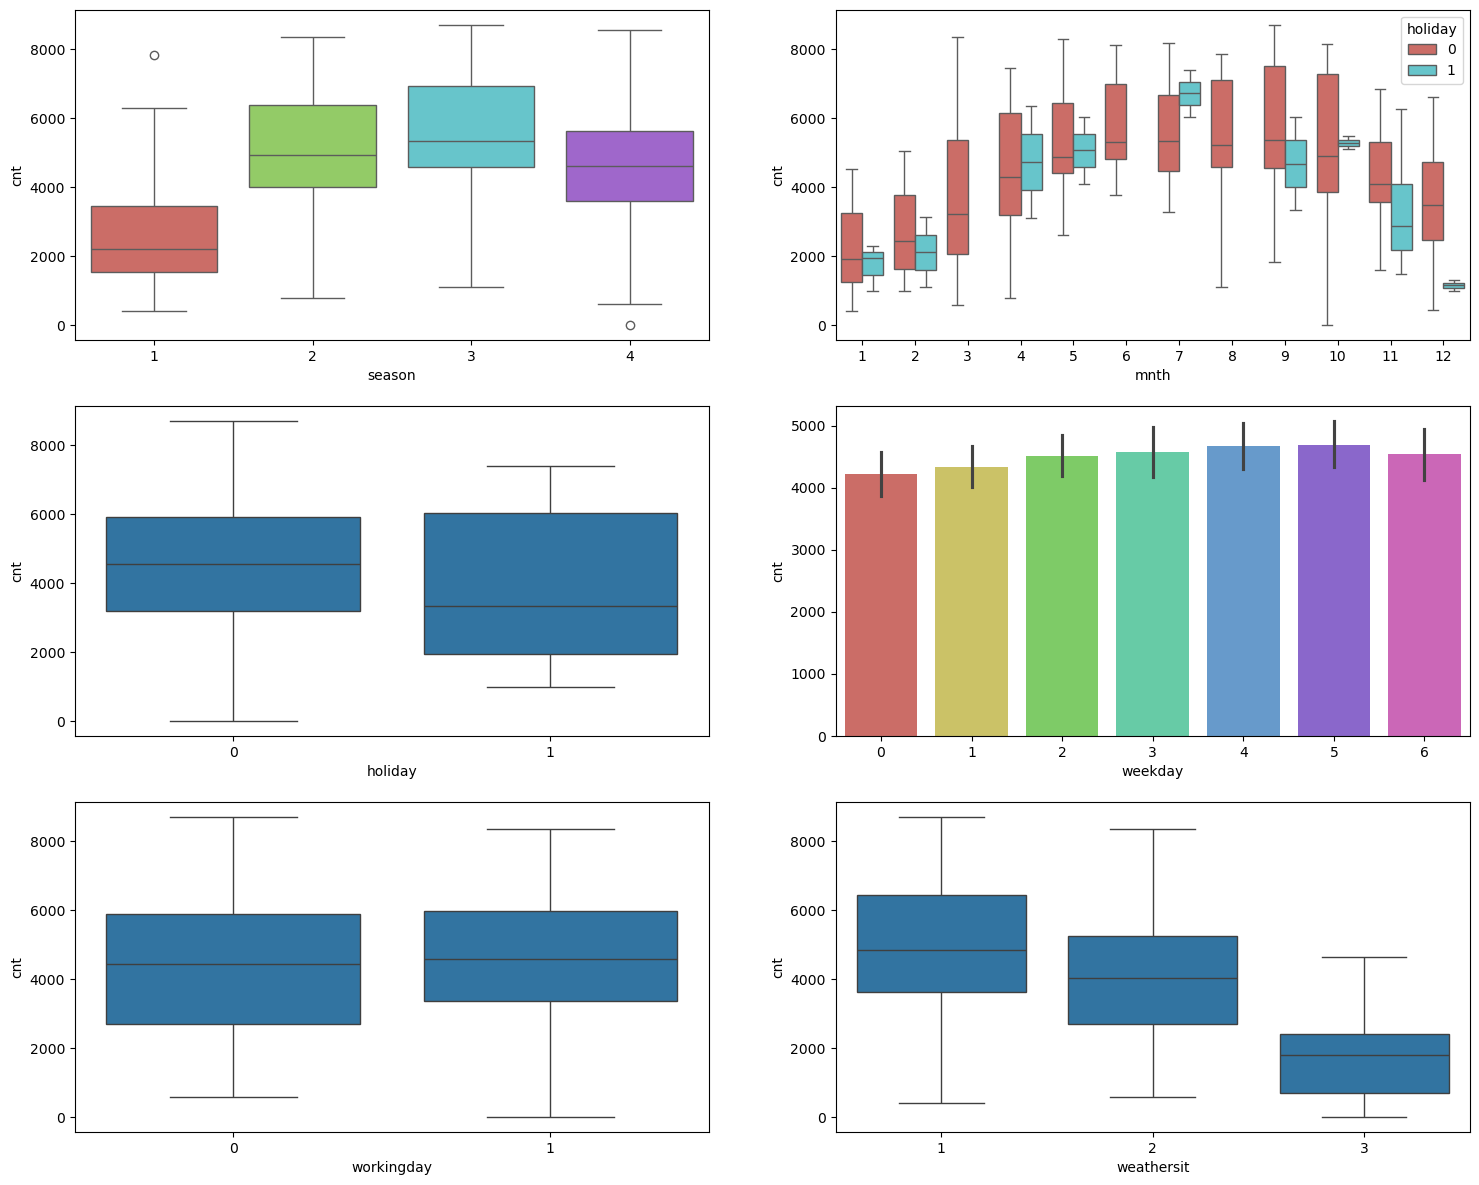

In [11]:
plt.figure(figsize=(18,30))

plt.subplot(6,2,1)
sns.boxplot(x= 'season', y='cnt', data = bike, palette = 'hls')

plt.subplot(6,2,2)
sns.boxplot(x= 'mnth', y='cnt', data = bike, hue = 'holiday', palette ='hls')

plt.subplot(6,2,3)
sns.boxplot(x= 'holiday', y='cnt', data = bike)

plt.subplot(6,2,4)
sns.barplot(x= 'weekday', y='cnt', data = bike, palette ='hls')

plt.subplot(6,2,5)
sns.boxplot(x= 'workingday', y='cnt', data = bike)

plt.subplot(6,2,6)
sns.boxplot(x= 'weathersit', y='cnt', data = bike)


plt.show()

## Observations: 
 - Seasons: Certain seasons have higher mean value of bookings, indicating a relationship between seasons and bike rentals
 - Months: Few woths have higher mean value of bookings, showing a stronger relationship between the month and average bike rentals
 - Holiday: A Holiday has a lower mean value of bike rental, indicating less bike rentals on a holiday
 - Weekday: Mid week has higher bike rentals if it's a holiday and there is a slight increasing trent across non-holiday weekdays
 - Working Day: Working day has very minimal change in mean value
 - Weathersit: The weather situation has a clear pattern with varying distribution levels in bike rentals

## 1.2 Plotting a pair plot to see relationship between the variables

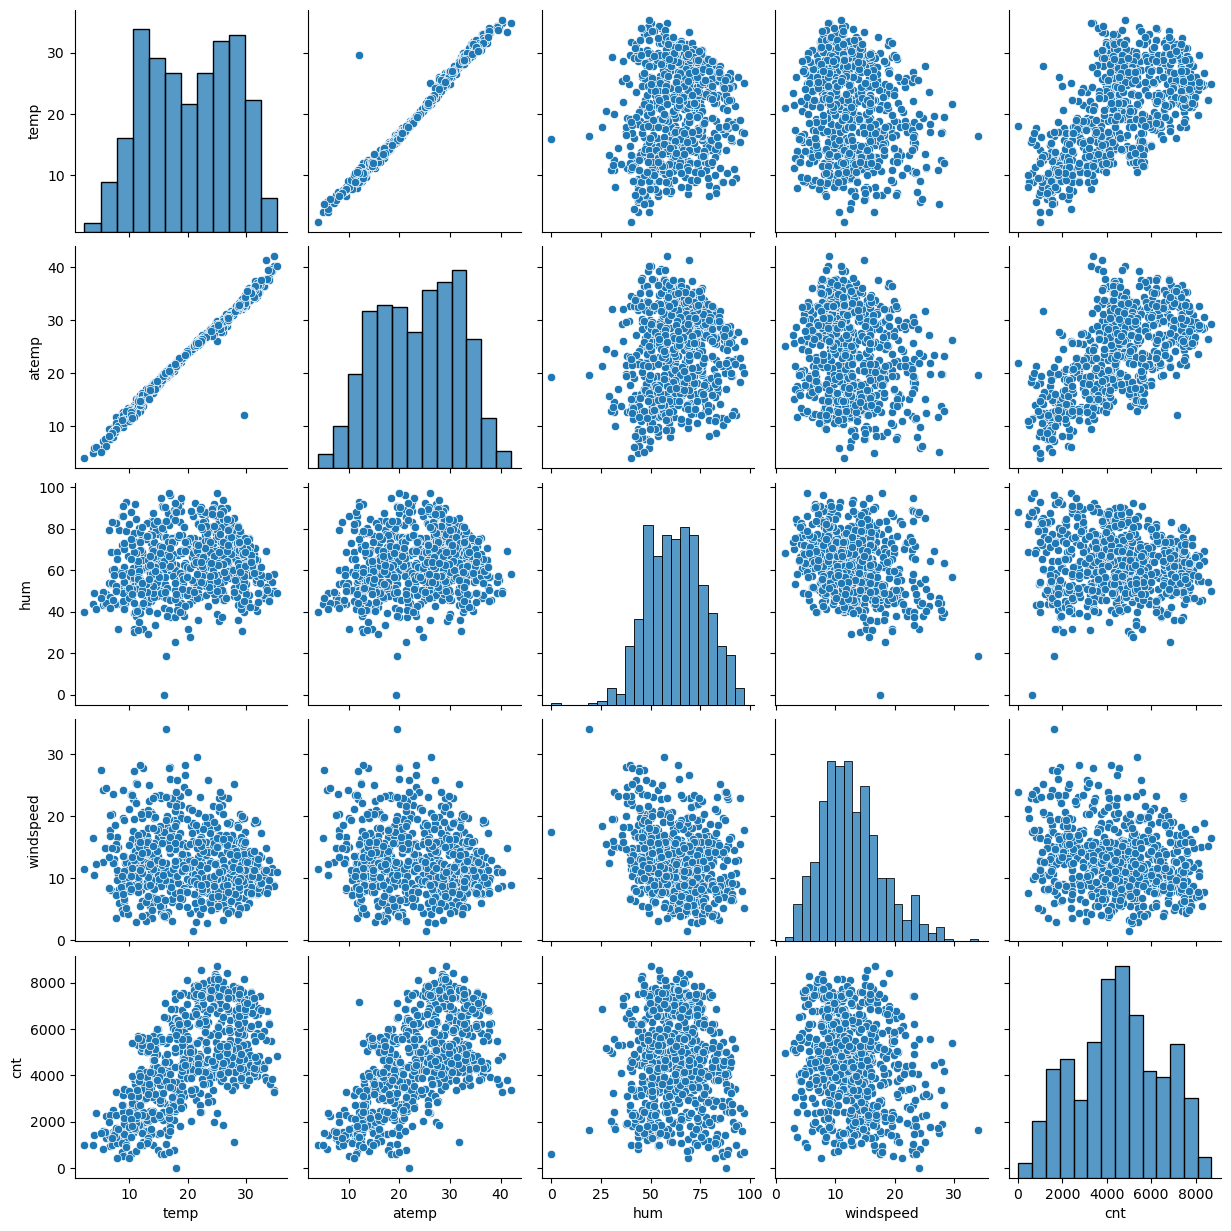

In [14]:
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed','cnt']])
plt.show()

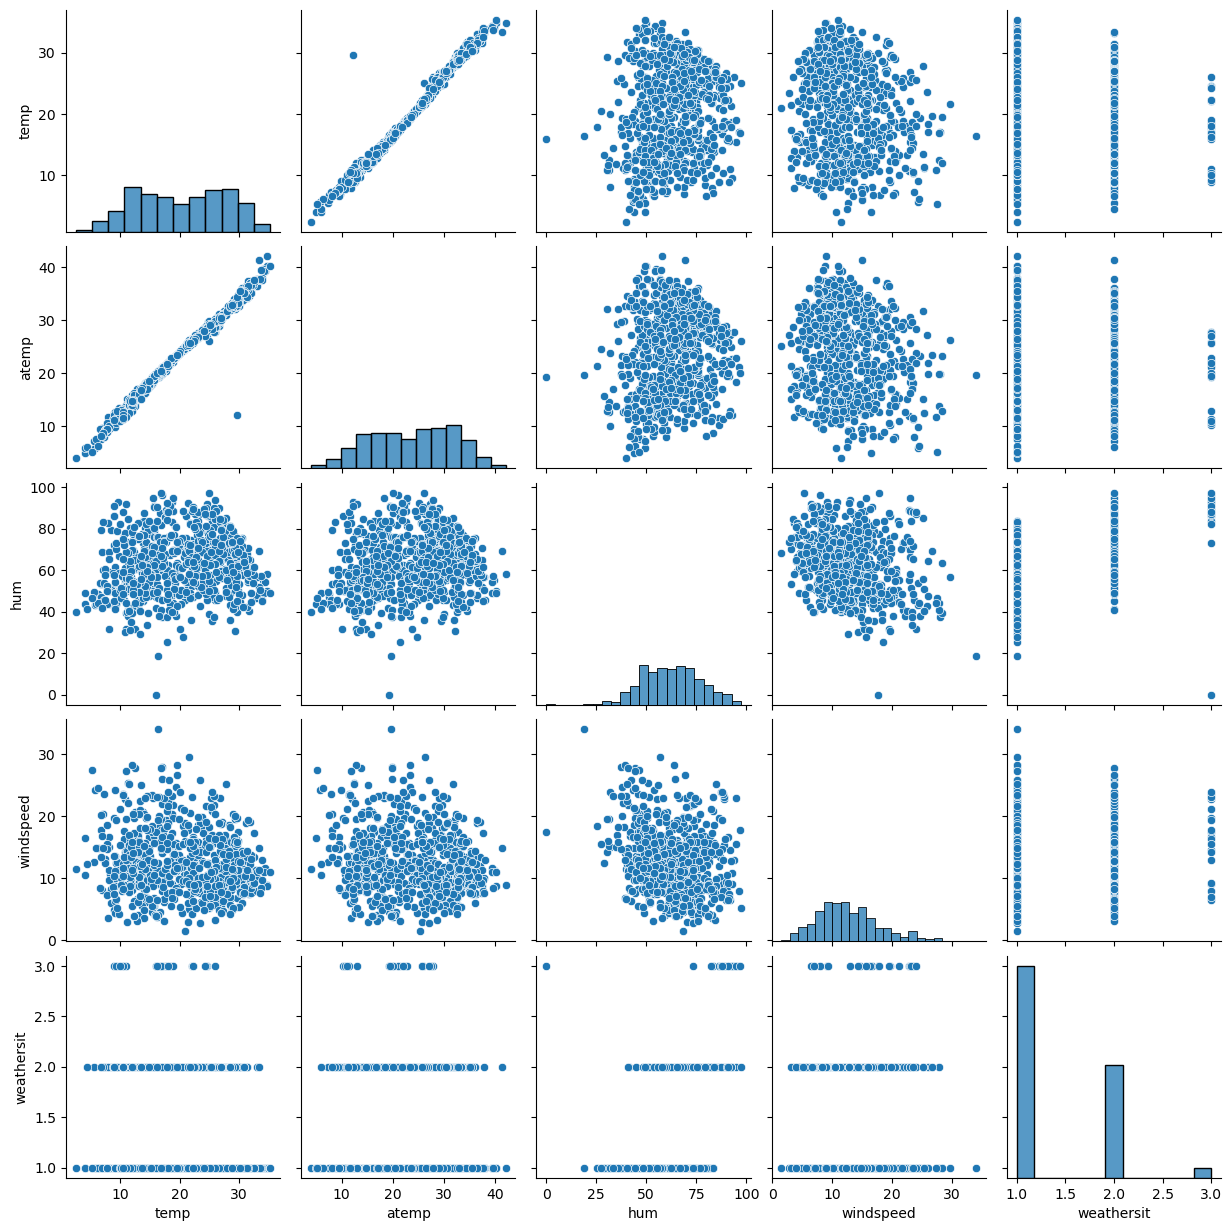

In [15]:
#Checking for relationship between Weathersit and other variables
sns.pairplot(bike[['temp', 'atemp', 'hum', 'windspeed','weathersit']])
plt.show()

## Observations: 
 - There is almost a very strong relationship between temp and atemp
 - Both causal and registered rides have an positive growth with increase in temp
 - All the rides are clustered within certain levels of humidity and windspeed
 - There is a pattern between Weeathersituation and humidity and windspeed, indicating a possible interdependency of the variables

## 1.3 Checking the correlation of continious variables 

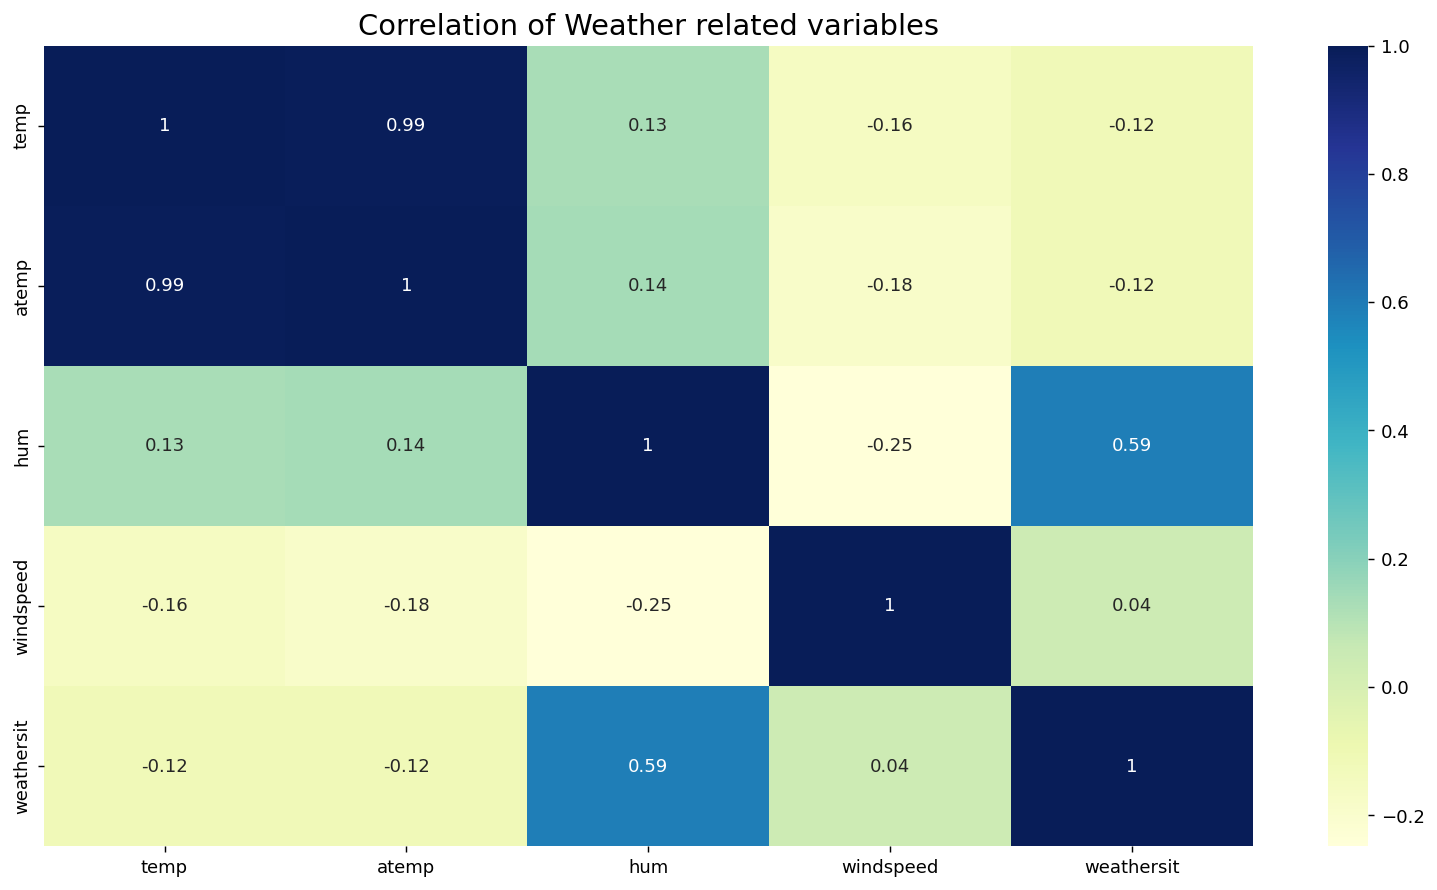

In [18]:
#Checking the correlation of the weather related variables 
w_vars=[ 'temp', 'atemp', 'hum', 'windspeed','weathersit']
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of Weather related variables",fontsize=16)
sns.heatmap(bike[w_vars].corr(),annot= True,cmap="YlGnBu") #YlGnBu
plt.show()

## Observations:
 - Temperature (temp) and Feeling Temperature(atemp) have a very high correlation of 0.99, so one of them can be dropped from the model
 - There is also a significant relation between Weather situation and humidity, which needs further scrutiny
 - Windspeed and Temperature have almost neglegible correlation with weathersituation 

# 2. Data Preperation

In [21]:
#Creating  no_of_days variable, keeping record of number of days

bike['no_of_days'] = (pd.to_datetime(bike['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days
bike['no_of_days']

0        0
1        1
2        2
3        3
4        4
      ... 
725    725
726    726
727    727
728    728
729    729
Name: no_of_days, Length: 730, dtype: int64

In [22]:
#Dropping atemp as it can be explained by temp 
#Dropping instant as it is just an index number
#
bike = bike.drop(['instant','atemp','casual','registered'], axis=1)
bike.columns

Index(['dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'hum', 'windspeed', 'cnt', 'no_of_days'],
      dtype='object')

In [23]:
bike[['weathersit']].value_counts()

weathersit
1             463
2             246
3              21
Name: count, dtype: int64

##### Weathersit has 4 categories, but the dataset provided has values only in 3 categories, to avaoid data loss not dropping a category from variable

In [25]:
bike = pd.get_dummies(data=bike,columns=['weathersit'], dtype = 'int')

In [26]:
bike[['mnth']].value_counts()

mnth
1       62
3       62
5       62
7       62
8       62
10      62
12      62
4       60
6       60
9       60
11      60
2       56
Name: count, dtype: int64

In [27]:
bike['mnth'] = bike['mnth'].map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'})
bike['mnth'].value_counts(sort=False)

mnth
jan     62
feb     56
mar     62
apr     60
may     62
jun     60
jul     62
aug     62
sept    60
oct     62
nov     60
dec     62
Name: count, dtype: int64

In [28]:
# Getting k-1 variables from categorical variables
bike = pd.get_dummies(data = bike, columns= ['mnth'] ,drop_first=True, dtype = 'int')
bike.columns

Index(['dteday', 'season', 'yr', 'holiday', 'weekday', 'workingday', 'temp',
       'hum', 'windspeed', 'cnt', 'no_of_days', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept'],
      dtype='object')

In [29]:
bike[['weekday']].value_counts()

weekday
0          105
1          105
6          105
2          104
4          104
5          104
3          103
Name: count, dtype: int64

In [30]:
# Getting k-1 variables from categorical variables

bike = pd.get_dummies(data=bike,columns=['weekday'],drop_first=True, dtype = 'int')
bike.columns

Index(['dteday', 'season', 'yr', 'holiday', 'workingday', 'temp', 'hum',
       'windspeed', 'cnt', 'no_of_days', 'weathersit_1', 'weathersit_2',
       'weathersit_3', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan',
       'mnth_jul', 'mnth_jun', 'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct',
       'mnth_sept', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6'],
      dtype='object')

In [31]:
bike[['season']].value_counts()

season
3         188
2         184
1         180
4         178
Name: count, dtype: int64

In [32]:
# Getting k-1 variables from categorical variables

bike['season']= bike['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
bike = pd.get_dummies(data=bike,columns=['season'],drop_first=True, dtype = 'int')


In [33]:
bike.columns

Index(['dteday', 'yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'cnt', 'no_of_days', 'weathersit_1', 'weathersit_2', 'weathersit_3',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4', 'weekday_5',
       'weekday_6', 'season_spring', 'season_summer', 'season_winter'],
      dtype='object')

In [34]:
bike = bike.loc[:,[ 'dteday', 'yr', 'holiday', 'workingday', 
                   
                   'temp','hum', 'windspeed', 'cnt', 
                   
                   'season_spring','season_summer', 'season_winter', 
                    
                   'mnth_jan','mnth_feb','mnth_mar', 'mnth_may','mnth_jun','mnth_jul','mnth_aug','mnth_sept','mnth_oct','mnth_nov','mnth_dec',
                    
                   'weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5', 'weekday_6', 
                    'weathersit_1', 'weathersit_2','weathersit_3', 'no_of_days']]

In [35]:
bike.head()

,dteday,yr,holiday,workingday,temp,hum,windspeed,cnt,season_spring,season_summer,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
0,2018-01-01,0,0,0,14.110847,80.5833,10.749882,985,1,0,...,0,0,0,0,0,1,0,1,0,0
1,2018-01-02,0,0,0,14.902598,69.6087,16.652113,801,1,0,...,0,0,0,0,0,0,0,1,0,1
2,2018-01-03,0,0,1,8.050924,43.7273,16.636703,1349,1,0,...,1,0,0,0,0,0,1,0,0,2
3,2018-01-04,0,0,1,8.200000,59.0435,10.739832,1562,1,0,...,0,1,0,0,0,0,1,0,0,3
4,2018-01-05,0,0,1,9.305237,43.6957,12.522300,1600,1,0,...,0,0,1,0,0,0,1,0,0,4


## 3. Train Test Split

In [37]:
#Creating y to store target 

y=bike.pop('cnt')

#X is all remainign variable also our independent variables
X=bike [['yr', 'holiday', 'workingday', 
        
         'temp','hum', 'windspeed', 
                   
        'season_spring','season_summer', 'season_winter', 
                    
        'mnth_jan','mnth_feb','mnth_mar', 'mnth_may','mnth_jun','mnth_jul','mnth_aug','mnth_sept','mnth_oct','mnth_nov','mnth_dec',
                    
        'weekday_1', 'weekday_2', 'weekday_3','weekday_4', 'weekday_5', 'weekday_6', 
        'weathersit_1', 'weathersit_2','weathersit_3', 'no_of_days']]


print(y.shape)
print(X.shape)

(730,)
(730, 30)


#### Adding Constant to Training data

In [39]:
X = sm.add_constant(X)

In [40]:
#Creating Train-Test Split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [41]:
print(bike.shape)
print(X_train.shape)

(730, 31)
(511, 31)


In [42]:
X_train.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
653,1.0,1,0,1,19.201653,55.8333,12.208807,0,0,1,...,0,1,0,0,0,0,1,0,0,653
576,1.0,1,0,1,29.246653,70.4167,11.083475,0,0,0,...,0,1,0,0,0,0,1,0,0,576
426,1.0,1,0,0,16.980847,62.1250,10.792293,1,0,0,...,0,0,0,0,0,1,0,1,0,426
728,1.0,1,0,0,10.489153,48.3333,23.500518,1,0,0,...,0,0,0,0,0,0,1,0,0,728
482,1.0,1,0,0,15.443347,48.9583,8.708325,0,1,0,...,0,0,0,0,0,1,0,1,0,482


## Scaling the variables

In [44]:
#Creating a temporary list with numberic variables, excluding dummy variables and 
num_vars = ['temp','hum','windspeed','no_of_days']

scaler = MinMaxScaler()

X_train[num_vars] = scaler.fit_transform(X_train[num_vars])

X_train[num_vars].head()

,temp,hum,windspeed,no_of_days
653,0.509887,0.575354,0.300794,0.896978
576,0.815169,0.725633,0.264686,0.791209
426,0.442393,0.640189,0.255342,0.585165
728,0.245101,0.498067,0.663106,1.000000
482,0.395666,0.504508,0.188475,0.662088


In [45]:
X_train.head()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,1,0,0,0.896978
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,1,0,0,0.791209
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,1,0,0.585165
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,1.000000
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,1,0,0.662088


In [46]:
X_train.isnull().sum()

const            0
yr               0
holiday          0
workingday       0
temp             0
hum              0
windspeed        0
season_spring    0
season_summer    0
season_winter    0
mnth_jan         0
mnth_feb         0
mnth_mar         0
mnth_may         0
mnth_jun         0
mnth_jul         0
mnth_aug         0
mnth_sept        0
mnth_oct         0
mnth_nov         0
mnth_dec         0
weekday_1        0
weekday_2        0
weekday_3        0
weekday_4        0
weekday_5        0
weekday_6        0
weathersit_1     0
weathersit_2     0
weathersit_3     0
no_of_days       0
dtype: int64

In [47]:
X_train.describe()

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
count,511.0,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,1.0,0.508806,0.025440,0.677104,0.537386,0.650333,0.320844,0.242661,0.246575,0.248532,...,0.150685,0.133072,0.158513,0.133072,0.127202,0.154599,0.626223,0.344423,0.029354,0.505822
std,0.0,0.500412,0.157613,0.468042,0.225640,0.145741,0.169639,0.429112,0.431440,0.432585,...,0.358092,0.339986,0.365579,0.339986,0.333525,0.361876,0.484280,0.475645,0.168963,0.288146
min,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.000000,0.000000,0.341151,0.538858,0.199179,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256181
50%,1.0,1.000000,0.000000,1.000000,0.542077,0.653499,0.298098,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.512363
75%,1.0,1.000000,0.000000,1.000000,0.735215,0.754401,0.414438,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.758929
max,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Adding Constant to Training data set

In [49]:
X_train 

,const,yr,holiday,workingday,temp,hum,windspeed,season_spring,season_summer,season_winter,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
653,1.0,1,0,1,0.509887,0.575354,0.300794,0,0,1,...,0,1,0,0,0,0,1,0,0,0.896978
576,1.0,1,0,1,0.815169,0.725633,0.264686,0,0,0,...,0,1,0,0,0,0,1,0,0,0.791209
426,1.0,1,0,0,0.442393,0.640189,0.255342,1,0,0,...,0,0,0,0,0,1,0,1,0,0.585165
728,1.0,1,0,0,0.245101,0.498067,0.663106,1,0,0,...,0,0,0,0,0,0,1,0,0,1.000000
482,1.0,1,0,0,0.395666,0.504508,0.188475,0,1,0,...,0,0,0,0,0,1,0,1,0,0.662088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,1,0.863973,0.679690,0.187140,0,0,0,...,0,0,0,1,0,0,1,0,0,0.793956
53,1.0,0,0,1,0.202618,0.435939,0.111379,1,0,0,...,0,0,1,0,0,0,1,0,0,0.072802
350,1.0,0,0,0,0.248216,0.577930,0.431816,0,0,1,...,0,0,0,0,0,1,0,1,0,0.480769
79,1.0,0,0,1,0.462664,0.759870,0.529881,0,1,0,...,1,0,0,0,0,0,0,1,0,0.108516


In [50]:
#np.asarray(X_train)

## Model 1 : Using Recursive Feature Elimination (RFE)

In [52]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [53]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [54]:
#initializing RFE
#Selecting 16 features at random to begin with 
rfe = RFE(estimator=LinearRegression(),n_features_to_select=15)

In [55]:
#Fitting RFE on Training Data
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [56]:
ranking = rfe.ranking_
features_selected = X_train.columns[rfe.support_] 
ranking = ranking[rfe.ranking_]

In [57]:
rfe_cols = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_cols.sort_values(by='Ranking')
rfe_cols = rfe_cols[rfe_cols['Select Status']==True]
rfe_cols

,Predictor,Select Status,Ranking
1,yr,True,1
2,holiday,True,1
4,temp,True,1
5,hum,True,1
6,windspeed,True,1
7,season_spring,True,1
9,season_winter,True,1
10,mnth_jan,True,1
15,mnth_jul,True,1
17,mnth_sept,True,1


In [58]:
X_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'season_spring',
       'season_winter', 'mnth_jan', 'mnth_jul', 'mnth_sept', 'weekday_6',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'no_of_days'],
      dtype='object')

In [59]:
#Defining a function to calculate Variance Infiltration Factor for a given training_data

def check_vif(training_data):
    
    vif = pd.DataFrame()
    vif['Features'] = training_data.columns
    vif['VIF'] = [variance_inflation_factor(training_data.values,i) for i in range(training_data.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    vif = vif.sort_values(by="VIF", ascending=False)
    print('The feature with highest VIF value:', vif.iloc[0])
    return vif
    

#check_vif()

In [60]:
#Selecting only required features for model creation in training data
X_train_rfe = X_train[features_selected]
X_train_rfe.shape

(511, 15)

In [61]:
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_6,weathersit_1,weathersit_2,weathersit_3,no_of_days
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,1,0,0,0.896978
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,1,0,0,0.791209
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,0,1,0,0.585165
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,1,0,0,1.000000
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,0,1,0,0.662088


In [62]:
result_vif = check_vif(X_train_rfe)
print('Feature with highest VIF',result_vif.iloc[0])
print(result_vif)   

The feature with highest VIF value: Features    weathersit_1
VIF                40.51
Name: 11, dtype: object
Feature with highest VIF Features    weathersit_1
VIF                40.51
Name: 11, dtype: object
         Features    VIF
11   weathersit_1  40.51
12   weathersit_2  27.93
14     no_of_days  14.02
0              yr  11.38
13   weathersit_3   3.84
6   season_winter   3.40
2            temp   3.29
5   season_spring   2.75
3             hum   1.89
7        mnth_jan   1.73
8        mnth_jul   1.31
4       windspeed   1.20
9       mnth_sept   1.18
1         holiday   1.02
10      weekday_6   1.02


In [63]:
result_vif.iloc[0]

Features    weathersit_1
VIF                40.51
Name: 11, dtype: object

In [64]:
#Dropping the variable with highest VIF, from list of selected features
features_selected = features_selected.drop(['weathersit_1'])

In [65]:
#updating the columns of the training data
X_train_rfe = X_train[features_selected]
X_train_rfe.head()

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_6,weathersit_2,weathersit_3,no_of_days
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0,0.896978
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0,0.791209
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0,0.585165
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0,1.000000
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,1,0,0.662088


## Model 2: Applying OLS
#### Applying Ordinary Least Squares method (OLS) to create model with updated feature list

In [67]:
X_train_sm = sm.add_constant(X_train_rfe)
lr_model = sm.OLS(y_train,X_train_sm)
lr_model_2 = lr_model.fit()
lr_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.7
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          8.30e-189
Time:                        22:02:43   Log-Likelihood:                -4124.1
No. Observations:                 511   AIC:                             8278.
Df Residuals:                     496   BIC:                             8342.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3192.5810    279.546     11.421      0.000    2643.341    3741.821
yr             2626.5822    234.510     11.200      0.000    2165.826    3087.338
holiday        -796.3570    223.343     -3.566      0.000   -1235.171    -357.543
temp           4169.3453    279.476     14.918      0.000    3620.242    4718.448
hum           -1283.7553    328.471     -3.908      0.000   -1929.122    -638.389
windspeed     -1595.2765    224.486     -7.106      0.000   -2036.338   -1154.215
season_spring  -908.1634    134.558     -6.749      0.000   -1172.538    -643.789
season_winter   724.1650    148.237      4.885      0.000     432.915    1015.415
mnth_jan       -482.6810    161.226     -2.994      0.003    -799.452    -165.910
mnth_jul       -643.6822    149.973     -4.292      0.000    -938.343    -349.021
mnth_sept       621.5967    138.933      4.474      0.000     348.627     894.566
weekday_6       160.6147     96.876      1.658      0.098     -29.724     350.954
weathersit_2   -487.8119     91.380     -5.338      0.000    -667.352    -308.271
weathersit_3  -2163.8912    229.665     -9.422      0.000   -2615.127   -1712.655
no_of_days    -1230.5178    452.099     -2.722      0.007   -2118.784    -342.252
==============================================================================
Omnibus:                       61.780   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.301
Skew:                          -0.668   Prob(JB):                     6.87e-30
Kurtosis:                       5.127   Cond. No.                         24.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
check_vif(X_train_rfe)

The feature with highest VIF value: Features    no_of_days
VIF              54.45
Name: 13, dtype: object


,Features,VIF
13,no_of_days,54.45
3,hum,24.82
0,yr,22.46
2,temp,17.73
6,season_winter,4.48
4,windspeed,4.08
5,season_spring,2.91
11,weathersit_2,2.26
7,mnth_jan,1.81
8,mnth_jul,1.41


## Model 3:
##### Dropping Column ['no_of_days']Number of Days, due to high VIF score

In [70]:
#updating list of selected features by dropping no_of_days, as it has high VIF

features_selected = features_selected.drop(['no_of_days'])

#Update the training data to contain only selected features
X_train_rfe = X_train[features_selected]

#Adding Constant usinf Stats Models 
X_train_sm = sm.add_constant(X_train_rfe)

In [71]:
# Applying OLS method
lr_model = sm.OLS(y_train,X_train_sm)

lr_model_3 = lr_model.fit()

lr_model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     201.2
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          2.23e-188
Time:                        22:02:43   Log-Likelihood:                -4127.9
No. Observations:                 511   AIC:                             8284.
Df Residuals:                     497   BIC:                             8343.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          3022.6649    274.237     11.022      0.000    2483.858    3561.472
yr             2018.0446     71.214     28.338      0.000    1878.127    2157.963
holiday        -820.4720    224.601     -3.653      0.000   -1261.756    -379.187
temp           4034.7509    276.834     14.575      0.000    3490.842    4578.660
hum           -1332.9208    330.082     -4.038      0.000   -1981.448    -684.393
windspeed     -1549.6956    225.299     -6.878      0.000   -1992.352   -1107.039
season_spring  -865.0371    134.481     -6.432      0.000   -1129.258    -600.816
season_winter   448.5444    108.953      4.117      0.000     234.479     662.610
mnth_jan       -342.5340    153.765     -2.228      0.026    -644.643     -40.425
mnth_jul       -675.9058    150.466     -4.492      0.000    -971.533    -380.278
mnth_sept       529.0879    135.577      3.902      0.000     262.713     795.463
weekday_6       149.3010     97.409      1.533      0.126     -42.084     340.686
weathersit_2   -476.3366     91.870     -5.185      0.000    -656.838    -295.836
weathersit_3  -2137.1625    230.929     -9.255      0.000   -2590.881   -1683.444
==============================================================================
Omnibus:                       62.281   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              140.387
Skew:                          -0.661   Prob(JB):                     3.28e-31
Kurtosis:                       5.202   Cond. No.                         18.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
X_train_rfe

,yr,holiday,temp,hum,windspeed,season_spring,season_winter,mnth_jan,mnth_jul,mnth_sept,weekday_6,weathersit_2,weathersit_3
653,1,0,0.509887,0.575354,0.300794,0,1,0,0,0,0,0,0
576,1,0,0.815169,0.725633,0.264686,0,0,0,1,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,1,0,0,0,0,1,1,0
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,0,0.863973,0.679690,0.187140,0,0,0,0,0,0,0,0
53,0,0,0.202618,0.435939,0.111379,1,0,0,0,0,0,0,0
350,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,1,1,0
79,0,0,0.462664,0.759870,0.529881,0,0,0,0,0,0,1,0


In [73]:
check_vif(X_train_rfe)

The feature with highest VIF value: Features      hum
VIF         23.28
Name: 3, dtype: object


,Features,VIF
3,hum,23.28
2,temp,15.98
4,windspeed,4.07
5,season_spring,2.91
11,weathersit_2,2.24
6,season_winter,2.12
0,yr,2.07
7,mnth_jan,1.67
8,mnth_jul,1.41
12,weathersit_3,1.21


## Model 4:
##### Dropping column ['hum'] (humidity) as it has high VIF score 

In [75]:
features_selected = features_selected.drop(['hum'])

X_train_rfe = X_train[features_selected]

X_train_sm = sm.add_constant(X_train_rfe)

lr_model = sm.OLS(y_train,X_train_sm)

lr_model_4 = lr_model.fit()

lr_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     210.1
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          4.43e-186
Time:                        22:02:43   Log-Likelihood:                -4136.1
No. Observations:                 511   AIC:                             8298.
Df Residuals:                     498   BIC:                             8353.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2312.5139    213.635     10.825      0.000    1892.776    2732.252
yr             2051.0731     71.822     28.558      0.000    1909.962    2192.184
holiday        -820.6278    228.027     -3.599      0.000   -1268.640    -372.615
temp           3766.8934    272.869     13.805      0.000    3230.777    4303.010
windspeed     -1302.7693    220.150     -5.918      0.000   -1735.306    -870.233
season_spring  -891.6405    136.368     -6.538      0.000   -1159.568    -623.713
season_winter   363.3234    108.520      3.348      0.001     150.110     576.537
mnth_jan       -376.0668    155.882     -2.413      0.016    -682.335     -69.799
mnth_jul       -610.9443    151.885     -4.022      0.000    -909.359    -312.530
mnth_sept       501.3253    137.468      3.647      0.000     231.237     771.414
weekday_6       168.9077     98.772      1.710      0.088     -25.153     362.969
weathersit_2   -688.9216     76.439     -9.013      0.000    -839.104    -538.739
weathersit_3  -2502.6449    215.695    -11.603      0.000   -2926.429   -2078.861
==============================================================================
Omnibus:                       65.147   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.565
Skew:                          -0.692   Prob(JB):                     2.46e-32
Kurtosis:                       5.219   Cond. No.                         14.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
check_vif(X_train_rfe)

The feature with highest VIF value: Features    temp
VIF         4.67
Name: 2, dtype: object


,Features,VIF
2,temp,4.67
3,windspeed,4.04
4,season_spring,2.25
0,yr,2.07
6,mnth_jan,1.60
10,weathersit_2,1.53
5,season_winter,1.40
7,mnth_jul,1.36
8,mnth_sept,1.20
9,weekday_6,1.19


## Model 5

##### Dropping the column ['mnth_jan'] as it is has higher p-value, indicating weak significance of the variable


In [78]:
features_selected = features_selected.drop(['mnth_jan'])

X_train_rfe = X_train[features_selected]

X_train_sm = sm.add_constant(X_train_rfe)

lr_model = sm.OLS(y_train,X_train_sm)

lr_model_5 = lr_model.fit()

lr_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     226.5
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          5.13e-186
Time:                        22:02:44   Log-Likelihood:                -4139.1
No. Observations:                 511   AIC:                             8302.
Df Residuals:                     499   BIC:                             8353.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2191.3007    208.644     10.503      0.000    1781.373    2601.229
yr             2044.4170     72.115     28.350      0.000    1902.731    2186.103
holiday        -828.2987    229.103     -3.615      0.000   -1278.424    -378.173
temp           3925.1904    266.139     14.749      0.000    3402.300    4448.081
windspeed     -1228.2346    219.021     -5.608      0.000   -1658.552    -797.917
season_spring  -975.0289    132.550     -7.356      0.000   -1235.454    -714.604
season_winter   398.9298    108.030      3.693      0.000     186.680     611.179
mnth_jul       -641.3487    152.091     -4.217      0.000    -940.166    -342.532
mnth_sept       492.9687    138.086      3.570      0.000     221.666     764.271
weekday_6       166.4463     99.243      1.677      0.094     -28.539     361.431
weathersit_2   -697.2782     76.728     -9.088      0.000    -848.028    -546.528
weathersit_3  -2491.3130    216.683    -11.498      0.000   -2917.036   -2065.590
==============================================================================
Omnibus:                       63.917   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.548
Skew:                          -0.678   Prob(JB):                     6.75e-32
Kurtosis:                       5.214   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
check_vif(X_train_rfe)

The feature with highest VIF value: Features    temp
VIF         4.65
Name: 2, dtype: object


,Features,VIF
2,temp,4.65
3,windspeed,4.03
0,yr,2.06
4,season_spring,1.66
9,weathersit_2,1.52
5,season_winter,1.40
6,mnth_jul,1.35
7,mnth_sept,1.20
8,weekday_6,1.19
10,weathersit_3,1.08


## Model 6: 
##### Dropping the column ['mnth_jan'] as it is has higher p-value, indicating weak significance of the variable

In [81]:
features_selected = features_selected.drop(['weekday_6'])

X_train_rfe = X_train[features_selected]

X_train_sm = sm.add_constant(X_train_rfe)

lr_model = sm.OLS(y_train,X_train_sm)

lr_model_6 = lr_model.fit()

lr_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.0
Date:                Wed, 25 Dec 2024   Prob (F-statistic):          1.28e-186
Time:                        22:02:44   Log-Likelihood:                -4140.5
No. Observations:                 511   AIC:                             8303.
Df Residuals:                     500   BIC:                             8350.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          2217.3479    208.442     10.638      0.000    1807.819    2626.877
yr             2040.7285     72.212     28.260      0.000    1898.853    2182.604
holiday        -856.2986    228.908     -3.741      0.000   -1306.038    -406.559
temp           3915.6576    266.560     14.690      0.000    3391.942    4439.373
windspeed     -1211.6310    219.194     -5.528      0.000   -1642.285    -780.977
season_spring  -973.7755    132.788     -7.333      0.000   -1234.667    -712.884
season_winter   401.9132    108.211      3.714      0.000     189.309     614.517
mnth_jul       -636.3103    152.336     -4.177      0.000    -935.609    -337.012
mnth_sept       495.7939    138.326      3.584      0.000     224.022     767.566
weathersit_2   -696.4152     76.865     -9.060      0.000    -847.434    -545.396
weathersit_3  -2487.3685    217.062    -11.459      0.000   -2913.835   -2060.902
==============================================================================
Omnibus:                       57.757   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.435
Skew:                          -0.600   Prob(JB):                     2.36e-30
Kurtosis:                       5.229   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
check_vif(X_train_rfe)

The feature with highest VIF value: Features    temp
VIF         4.61
Name: 2, dtype: object


,Features,VIF
2,temp,4.61
3,windspeed,4.00
0,yr,2.06
4,season_spring,1.64
8,weathersit_2,1.52
5,season_winter,1.39
6,mnth_jul,1.35
7,mnth_sept,1.20
9,weathersit_3,1.08
1,holiday,1.04


##### This Model has a high F-Statistic score and p values are insignificant
##### This model explains the predictor variables witha good Rsquared value and Adjusted R-squared value as well. 

In [84]:
lr_model_6.params

const            2217.347907
yr               2040.728472
holiday          -856.298580
temp             3915.657583
windspeed       -1211.631001
season_spring    -973.775471
season_winter     401.913171
mnth_jul         -636.310347
mnth_sept         495.793864
weathersit_2     -696.415150
weathersit_3    -2487.368512
dtype: float64

## Testing Model Accuracy on Training Data: 
##### Using Model 6 to predict Y (count) and checking for difference in predicted values of Y and given values od Y in training data

In [86]:

y_train_pred = lr_model_6.predict(X_train_sm)
print('y_train_pred Shape:',y_train_pred.shape)
print('y_train Shape:',y_train_pred.shape)

y_train_pred Shape: (511,)
y_train Shape: (511,)


In [87]:
errors = y_train_pred - y_train

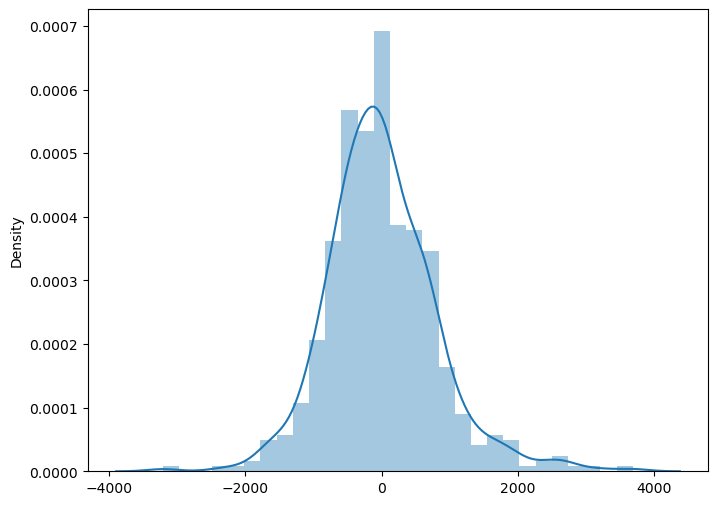

In [88]:
plt.figure(figsize=(8,6))
sns.distplot(errors)
plt.show()

##### The Error terms are normally distributed, with mean value at zero

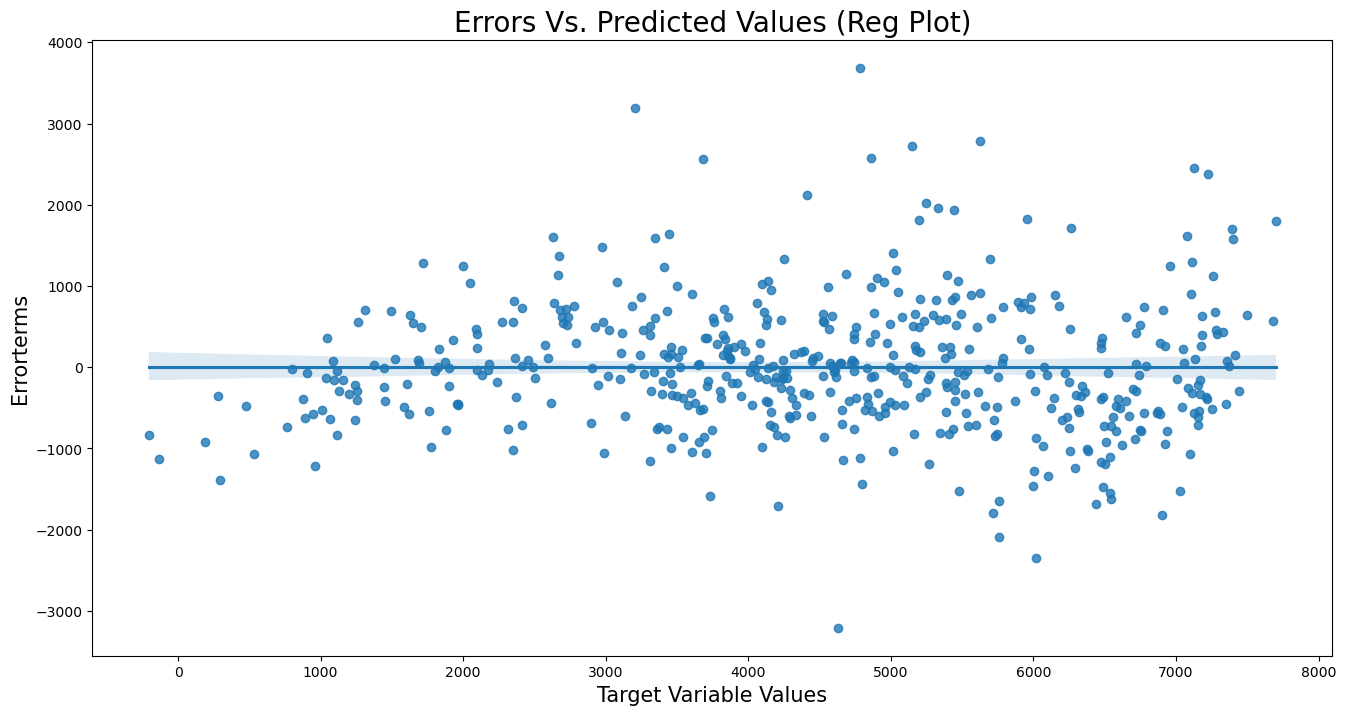

In [90]:
# plotting linear regression data fit 

fig, ax = plt.subplots(figsize=(16,8))
sns.regplot(x=y_train_pred, y=errors,ax=ax)
plt.title('Errors Vs. Predicted Values (Reg Plot)', fontdict={'fontsize': 20})
plt.xlabel('Target Variable Values', fontdict={'fontsize': 15})
plt.ylabel('Errorterms', fontdict={'fontsize': 15})
plt.show()

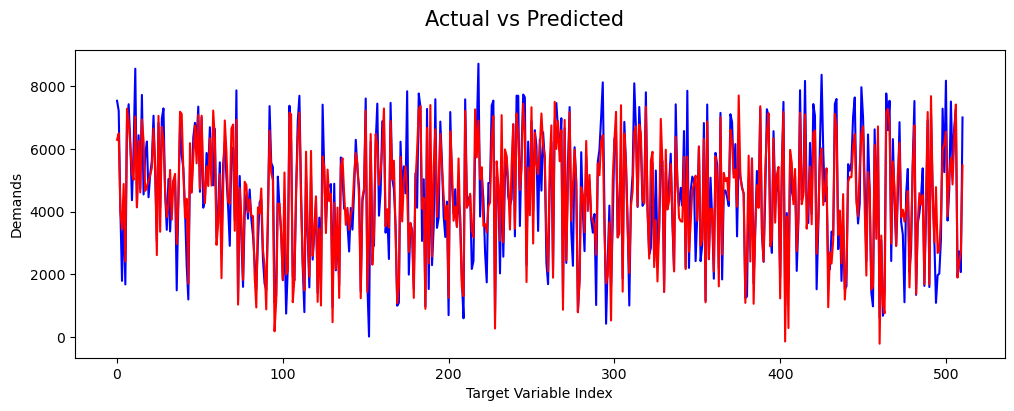

In [91]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.figure(figsize=(12,4))
plt.plot(c,y_train, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Target Variable Index')
plt.ylabel('Demands')
plt.show()

##### The predeicted Y values follow similar pattern like Y actuals

In [93]:
errors.shape

(511,)

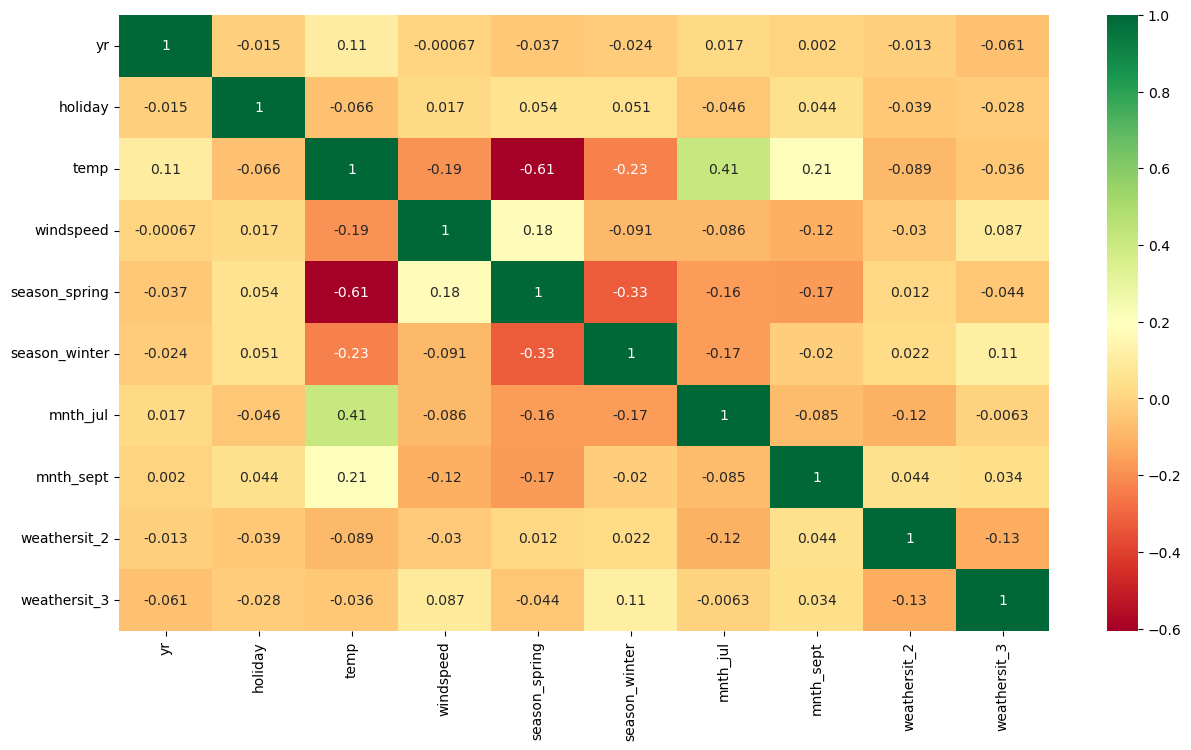

In [94]:

plt.figure(figsize=(15,8)) 
sns.heatmap(X_train_rfe.corr(),annot = True, cmap="RdYlGn")
plt.show()


####  Equation of the final LR model 
##### Demand of bike rentals (count of rentals on a given day) Y = 2040.728472 (yr) -856.298580(holiday) +3915.657583 (temp) -1211.631001(windspeed)-973.775471(season_spring) + 401.913171(season_winter) -636.310347(mnth_jul) + 495.793864 (mnth_sept)-696.415150 (weathersit_2) -2487.368512 (weathersit_3) + 2217.347907

## Applying Model on Test Data

In [97]:
X_test[num_vars] = scaler.fit_transform(X_test[num_vars])

X_test[num_vars].head()

,temp,hum,windspeed,no_of_days
184,0.837241,0.534223,0.149393,0.249311
535,0.911423,0.470417,0.231142,0.732782
299,0.496221,0.777843,0.443398,0.407713
221,0.890387,0.236659,0.449707,0.300275
152,0.821739,0.070765,0.682387,0.205234


In [98]:
# Updating columns of test data to have only selected features predicted by final LR model 
X_test = X_test[features_selected]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,yr,holiday,temp,windspeed,season_spring,season_winter,mnth_jul,mnth_sept,weathersit_2,weathersit_3
184,1.0,0,1,0.837241,0.149393,0,0,1,0,1,0
535,1.0,1,0,0.911423,0.231142,0,0,0,0,0,0
299,1.0,0,0,0.496221,0.443398,0,1,0,0,1,0
221,1.0,0,0,0.890387,0.449707,0,0,0,0,0,0
152,1.0,0,0,0.821739,0.682387,0,0,0,0,0,0


In [99]:
y_test.head()

184    6043
535    6211
299    2659
221    4780
152    4968
Name: cnt, dtype: int64

In [100]:
y_test_pred = lr_model_6.predict(X_test_sm)

In [101]:
errors_test = y_test - y_test_pred

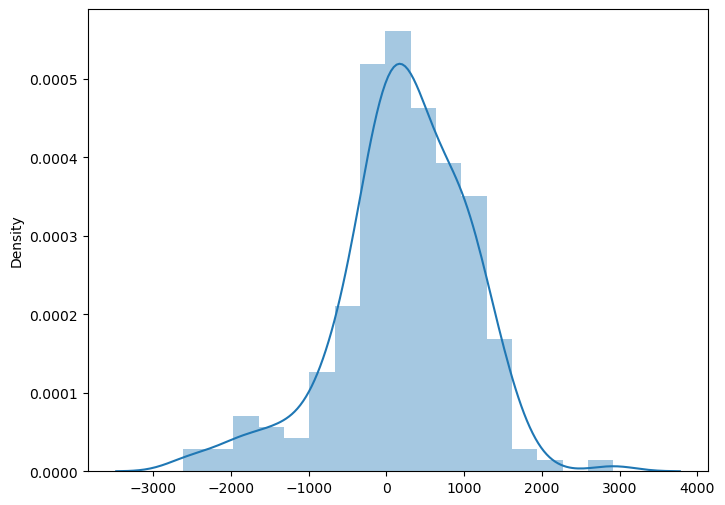

In [102]:
plt.figure(figsize=(8,6))
sns.distplot(errors_test)
plt.show()

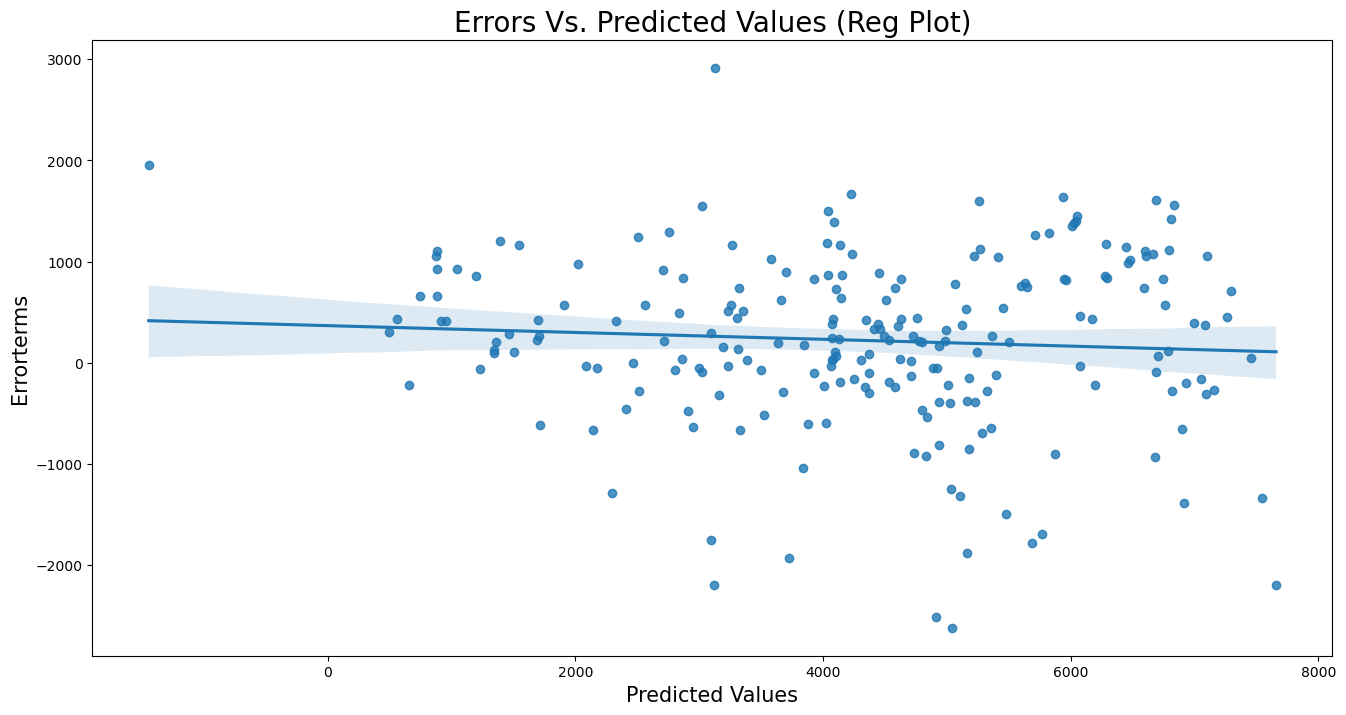

In [103]:
fig, ax = plt.subplots(figsize=(16,8))
sns.regplot(x=y_test_pred, y=errors_test,ax=ax)
plt.title('Errors Vs. Predicted Values (Reg Plot)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Errorterms', fontdict={'fontsize': 15})
plt.show()

In [104]:
from sklearn.metrics import r2_score

In [105]:
# calculating the r2_score
r2_score = r2_score(y_test, y_test_pred)
round(r2_score,4)

0.7915

In [106]:

# Calculating Adjusted-R square value for the test dataset

adjusted_r2 = round(1-(1-r2_score)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7814


#### R Squared value is 0.7915 and Adjusted Rsquared value is 0.7814 between Test values and predicted values of Test data set, indicates the model is a good fit 